In [1]:
# Import required libraries and scripts
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_data, convert_date_columns
from src.data_preprocessing import preprocess_data
from src.feature_engineering import feature_engineer, encode_target

# Set the path to your data directory
DB_PATH = 'data'

# Load the data
weather_df, air_quality_df = load_data(DB_PATH)


In [2]:
# Display first few rows of the dataset
display(weather_df.head())

# Show data types of each column
display(weather_df.dtypes)

,data_ref,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Wind Direction,Daily Solar Panel Efficiency
0,4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea,01/04/2014,-,2,2,2,28.4,32.4,7.5,25.9,8.07,18.0,-59.3,100.0,1006,VH,W,High
1,c9d3c825-fd94-4e61-a4bc-2cf0f2208de0,02/04/2014,0,0,0,--,28.8,32.6,--,33.1,7.57,23.0,59.2,100.0,1005,Very High,S,Medium
2,6d445ffb-d4c2-4f94-a27e-224fabe46d10,03/04/2014,0,0,0,0,29.3,--,--,43.2,6.72,16.0,59.7,98.5,1005,Low,E,Medium
3,7a404c50-710f-451a-9a42-a66bb783a3d0,04/04/2014,0,0,0,0,28.6,32.4,7.4,33.1,7.55,20.0,59.1,100.0,1011,Very High,W,Medium
4,0d3194a7-ad1a-456e-9bf8-b1bae730977b,05/04/2014,23.4,15.2,17.2,17.4,26.4,28,5.4,28.1,5.27,74.0,58.9,100.0,1012,Very High,east,Low


data_ref                          object
date                              object
Daily Rainfall Total (mm)         object
Highest 30 Min Rainfall (mm)      object
Highest 60 Min Rainfall (mm)      object
Highest 120 Min Rainfall (mm)     object
Min Temperature (deg C)           object
Maximum Temperature (deg C)       object
Min Wind Speed (km/h)             object
Max Wind Speed (km/h)             object
Sunshine Duration (hrs)          float64
Cloud Cover (%)                  float64
Wet Bulb Temperature (deg F)     float64
Relative Humidity (%)            float64
Air Pressure (hPa)                 int64
Dew Point Category                object
Wind Direction                    object
Daily Solar Panel Efficiency      object
dtype: object

data_ref                          0
date                              0
Daily Rainfall Total (mm)         0
Highest 30 Min Rainfall (mm)      0
Highest 60 Min Rainfall (mm)      0
Highest 120 Min Rainfall (mm)     0
Min Temperature (deg C)           0
Maximum Temperature (deg C)       0
Min Wind Speed (km/h)             0
Max Wind Speed (km/h)            15
Sunshine Duration (hrs)          16
Cloud Cover (%)                  16
Wet Bulb Temperature (deg F)      0
Relative Humidity (%)             0
Air Pressure (hPa)                0
Dew Point Category                0
Wind Direction                    0
Daily Solar Panel Efficiency      0
dtype: int64

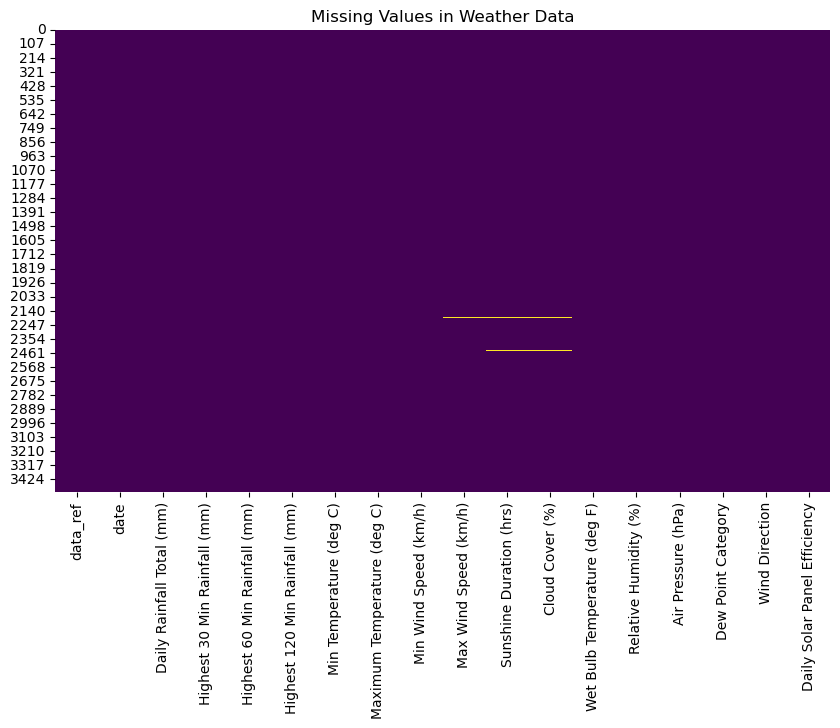

In [3]:
# Count missing values in each column
missing_values = weather_df.isnull().sum()
display(missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(weather_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Weather Data')
plt.show()

In [4]:
# Identify columns with infinite values
infinite_values = weather_df.isin([np.inf, -np.inf]).sum()
display(infinite_values)


data_ref                         0
date                             0
Daily Rainfall Total (mm)        0
Highest 30 Min Rainfall (mm)     0
Highest 60 Min Rainfall (mm)     0
Highest 120 Min Rainfall (mm)    0
Min Temperature (deg C)          0
Maximum Temperature (deg C)      0
Min Wind Speed (km/h)            0
Max Wind Speed (km/h)            0
Sunshine Duration (hrs)          0
Cloud Cover (%)                  0
Wet Bulb Temperature (deg F)     0
Relative Humidity (%)            0
Air Pressure (hPa)               0
Dew Point Category               0
Wind Direction                   0
Daily Solar Panel Efficiency     0
dtype: int64

In [5]:
# Identify columns with negative values
negative_values = weather_df.select_dtypes(include=[np.number]).lt(0).sum()
display(negative_values)


Sunshine Duration (hrs)           0
Cloud Cover (%)                   0
Wet Bulb Temperature (deg F)    178
Relative Humidity (%)             0
Air Pressure (hPa)                0
dtype: int64

In [6]:
# Summary statistics before cleaning
summary_stats_before = weather_df.describe()
display(summary_stats_before)


,Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa)
count,3501.000000,3501.000000,3517.000000,3517.000000,3517.000000
mean,7.018320,28.682376,52.946062,97.366761,1008.668467
std,1.389904,20.788299,25.842174,5.043705,3.513724
min,0.000000,2.000000,-60.700000,68.600000,998.000000
25%,6.710000,17.000000,58.400000,96.700000,1006.000000
50%,7.400000,22.000000,58.900000,100.000000,1009.000000
75%,7.840000,30.000000,59.400000,100.000000,1011.000000
max,9.150000,100.000000,61.800000,100.000000,1020.000000


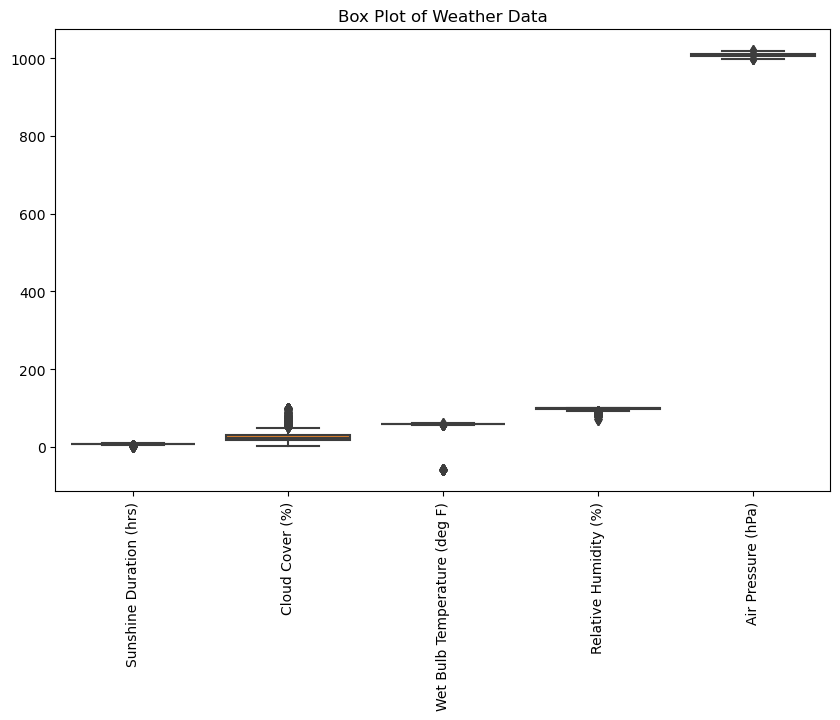

In [7]:
# Box plots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_df.select_dtypes(include=[np.number]))
plt.title('Box Plot of Weather Data')
plt.xticks(rotation=90)
plt.show()



# Conclusion

Based on the initial exploration, we identified several issues in the weather dataset, including:
- Missing values in multiple columns.
- Presence of infinite values.
- Negative values in columns where they are not logically possible (e.g., wind speed).
- Outliers in various columns.

These findings informed the data cleaning process applied in the preprocessing script. The cleaned dataset is now ready for further analysis and modeling.


In [8]:
# Convert date columns to datetime
weather_df, air_quality_df = convert_date_columns(weather_df, air_quality_df)

In [9]:
# Preprocess the data
weather_df_scaled, air_quality_df = preprocess_data(weather_df, air_quality_df)

Weather DataFrame to be scaled (head):
   Daily Rainfall Total (mm)  Highest 30 Min Rainfall (mm)  \
0                   5.250711                           2.0   
1                   0.000000                           0.0   
2                   0.000000                           0.0   
3                   0.000000                           0.0   
4                  23.400000                          15.2   

   Highest 60 Min Rainfall (mm)  Highest 120 Min Rainfall (mm)  \
0                           2.0                            2.0   
1                           0.0                            2.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                          17.2                           17.4   

   Min Temperature (deg C)  Maximum Temperature (deg C)  \
0                     28.4                         32.4   
1                     28.8                         32.6   
2             

C:\Users\Ken\Documents\AISG Assessment 2\AIAP 18 Assessment\src\data_preprocessing.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_df['rainfall_intensity'].replace([np.inf, -np.inf], 1e6, inplace=True)


# Data Cleaning Summary

During the data cleaning process, we addressed the following issues:
- Replaced missing values using forward fill method.
- Identified and handled infinite values by replacing them with appropriate large finite values.
- Detected and replaced negative values in columns where they are not logical (e.g., wind speed).
- Ensured proper data types and handled any inconsistencies.


Summary Statistics for Weather Data:
                                date  Daily Rainfall Total (mm)  \
count                           3517                3517.000000   
mean   2018-08-18 05:47:36.866647552                   5.250711   
min              2014-04-01 00:00:00                   0.000000   
25%              2016-06-02 00:00:00                   0.000000   
50%              2018-08-18 00:00:00                   0.000000   
75%              2020-10-27 00:00:00                   4.000000   
max              2022-12-31 00:00:00                 210.600000   
std                              NaN                  12.472992   

       Highest 30 Min Rainfall (mm)  Highest 60 Min Rainfall (mm)  \
count                   3517.000000                   3517.000000   
mean                       3.159340                      3.788172   
min                        0.000000                      0.000000   
25%                        0.000000                      0.000000   
50%           

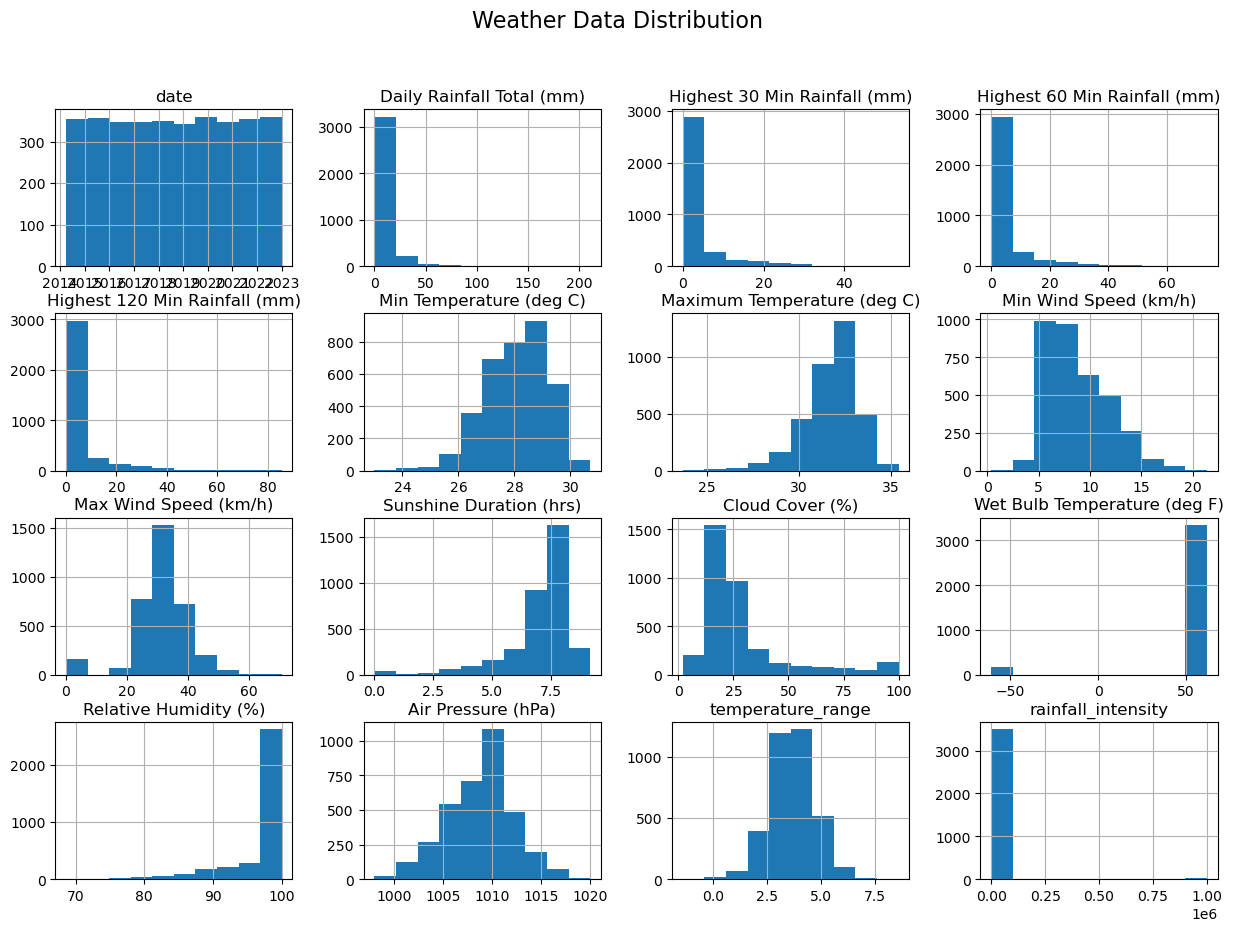

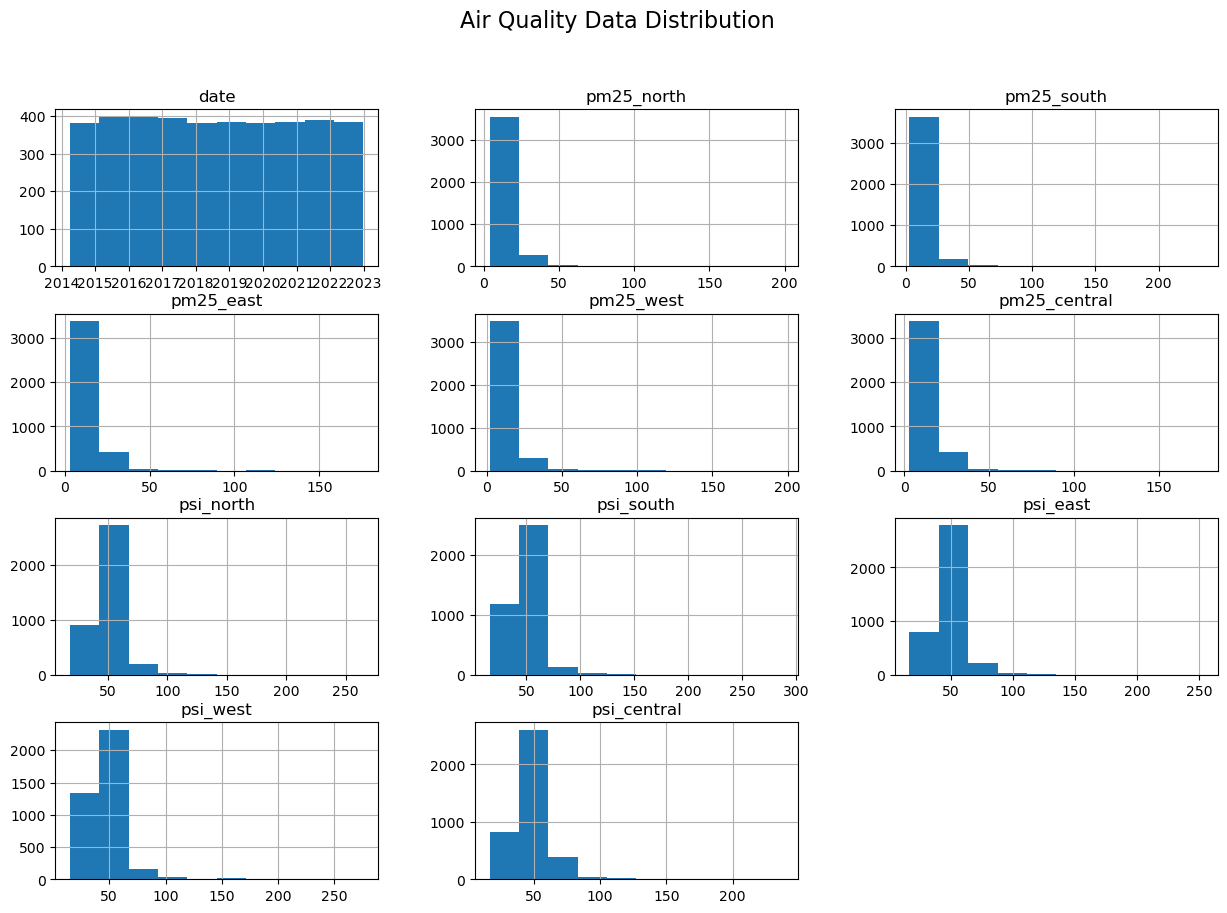

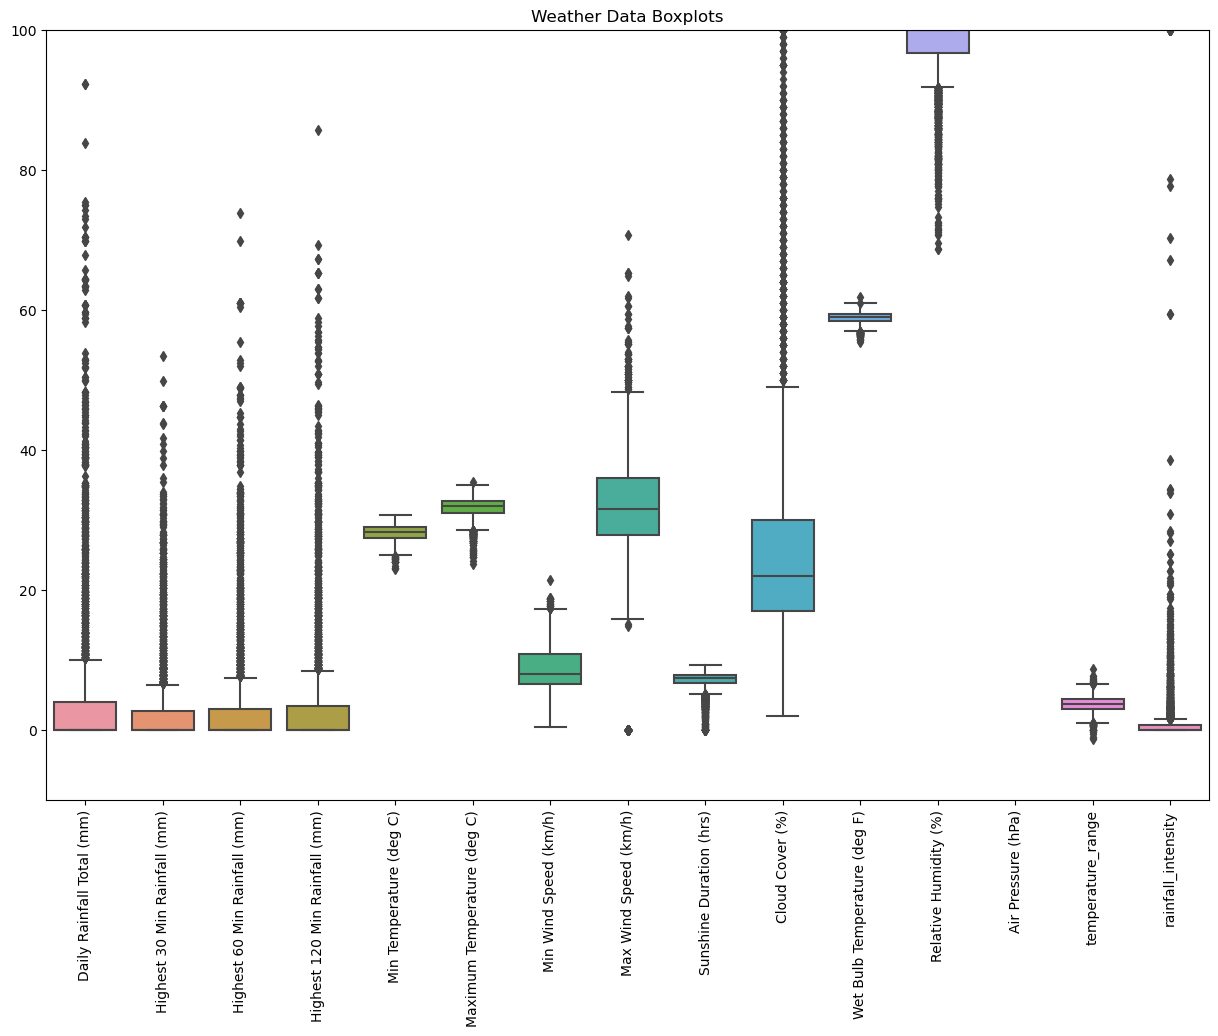

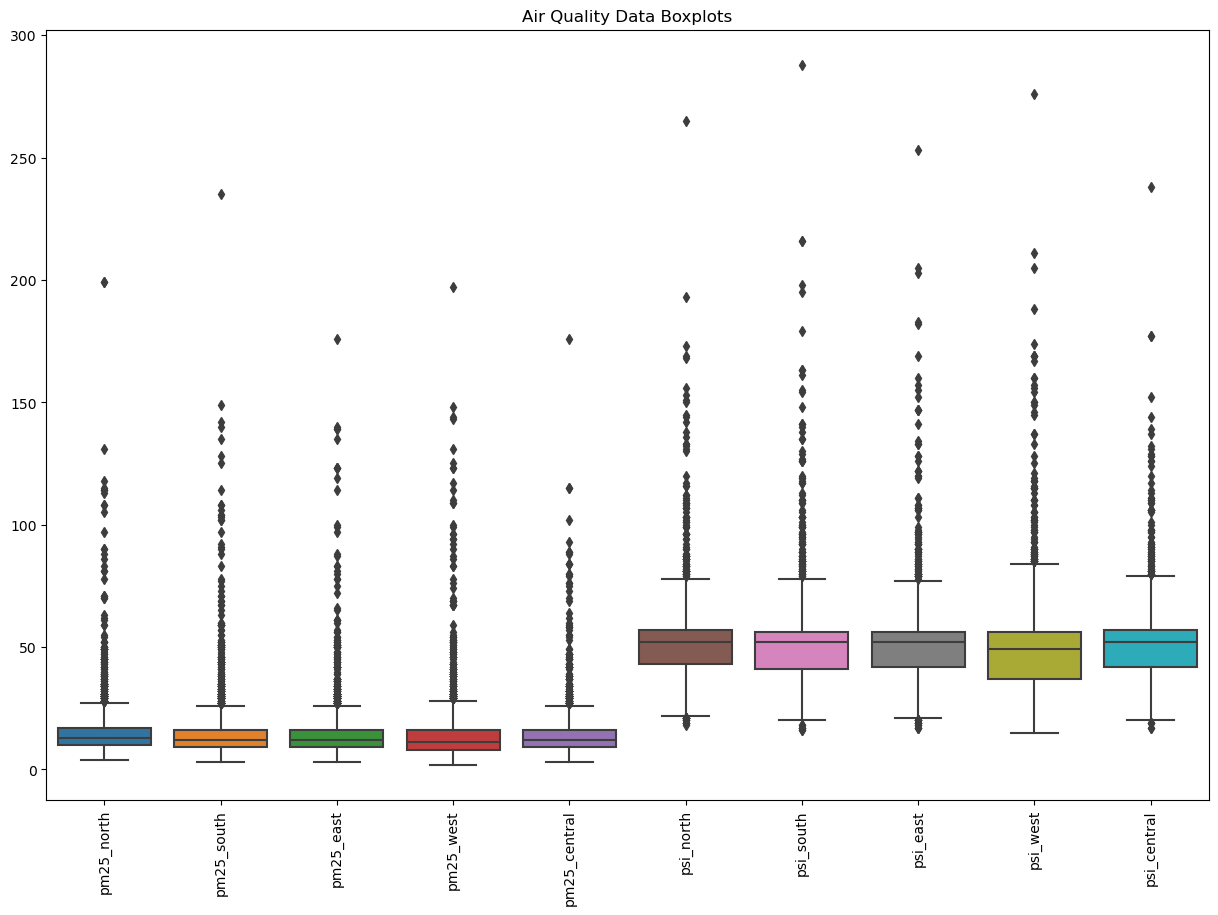

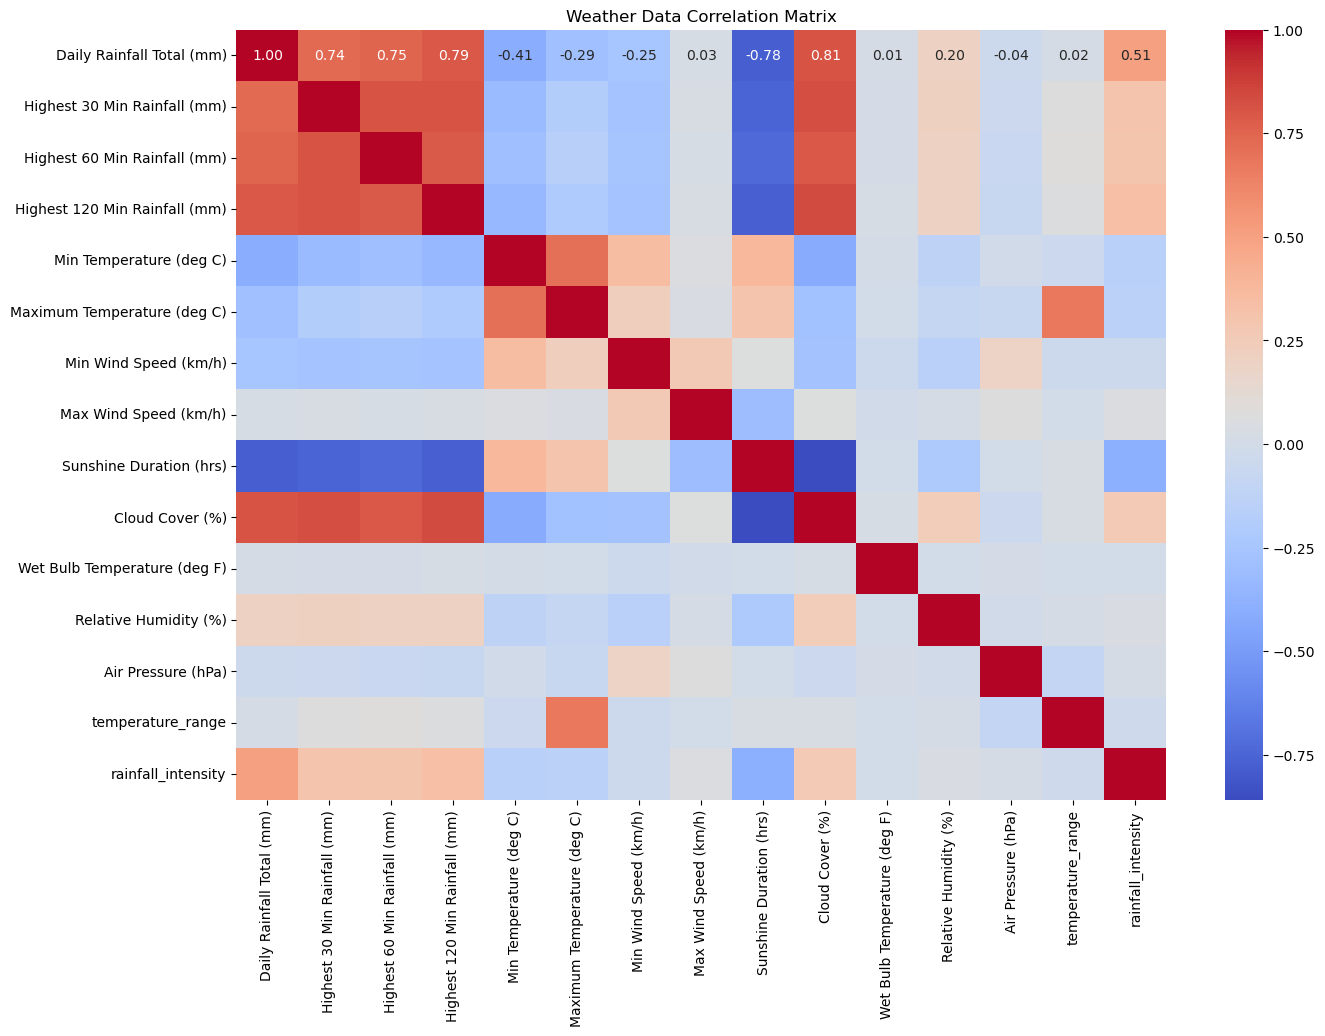

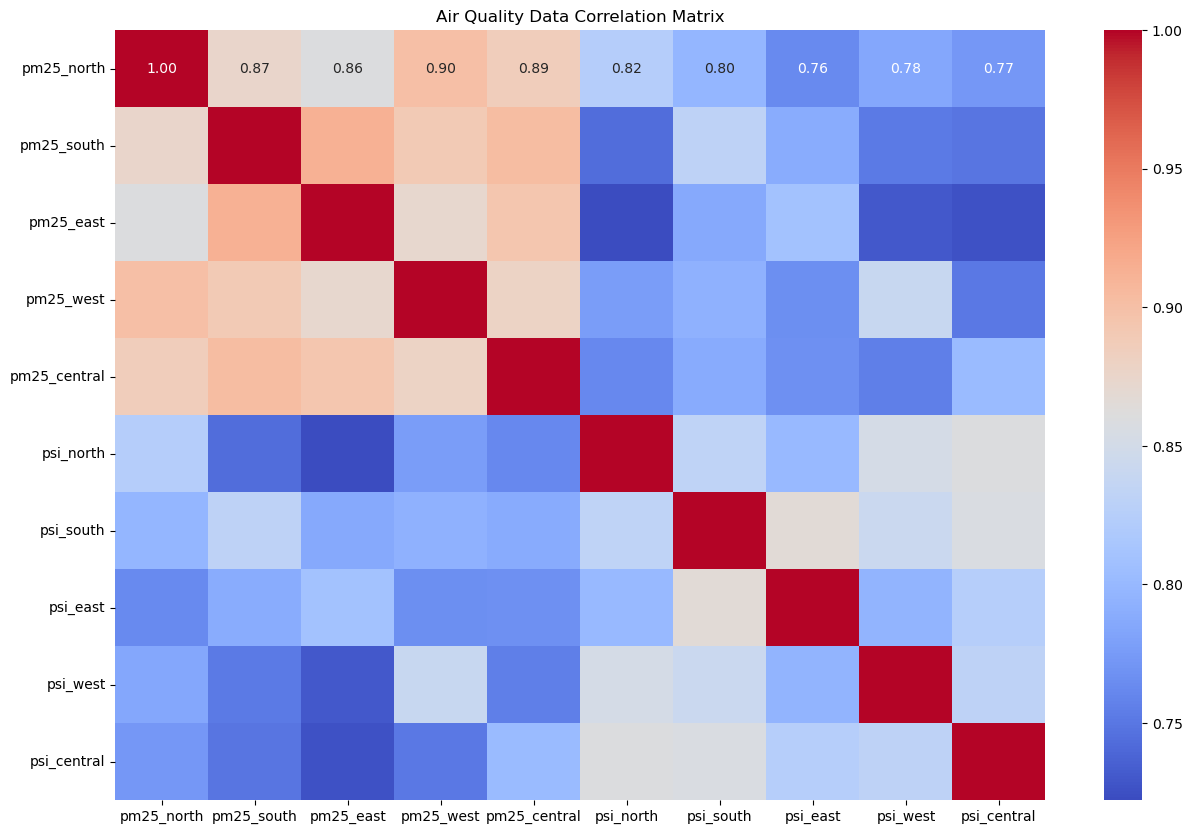

In [10]:
# Data Verification after Cleanup

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary Statistics for Weather Data:")
print(weather_df.describe())

print("Summary Statistics for Air Quality Data:")
print(air_quality_df.describe())

# Histograms
weather_df.hist(figsize=(15, 10))
plt.suptitle('Weather Data Distribution', fontsize=16)
plt.show()

air_quality_df.hist(figsize=(15, 10))
plt.suptitle('Air Quality Data Distribution', fontsize=16)
plt.show()

# Boxplots with capped extreme values for better visualization
plt.figure(figsize=(15, 10))

# Cap extreme values in rainfall_intensity
capped_weather_df = weather_df.copy()
capped_weather_df['rainfall_intensity'] = capped_weather_df['rainfall_intensity'].apply(lambda x: min(x, 100))

sns.boxplot(data=capped_weather_df)
plt.title('Weather Data Boxplots')
plt.xticks(rotation=90)
plt.ylim(-10, 100)  # Adjust this range as needed
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=air_quality_df)
plt.title('Air Quality Data Boxplots')
plt.xticks(rotation=90)
plt.show()

# Correlation Matrix for Weather Data (excluding non-numeric columns)
plt.figure(figsize=(15, 10))
numeric_weather_df = weather_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_weather_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Weather Data Correlation Matrix')
plt.show()

# Correlation Matrix for Air Quality Data (excluding non-numeric columns)
plt.figure(figsize=(15, 10))
numeric_air_quality_df = air_quality_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_air_quality_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Air Quality Data Correlation Matrix')
plt.show()


# Summary of Key Findings

# Key Findings from EDA

## Summary Statistics
- The weather data and air quality data have been successfully loaded and preprocessed.
- Summary statistics provide a good overview of the central tendency, dispersion, and shape of the data’s distribution.

## Histograms
- The histograms indicate the distribution of numerical features.
- Most features show a normal distribution, while some, like rainfall-related features, show skewness.

## Boxplots
- Boxplots reveal the presence of outliers in the dataset.
- For the weather data, extreme outliers in `rainfall_intensity` were capped for better visualization.
- Air quality data also shows variability across different regions.

## Correlation Matrix
- The correlation matrix for weather data shows significant correlations between:
  - `Max Temperature` and `Min Temperature`
  - `Sunshine Duration` and `Daily Rainfall Total`
- The correlation matrix for air quality data highlights:
  - Strong correlations between different regions' PM2.5 levels.
  - Strong correlations between different regions' PSI levels.

## Data Preparation Insights
- The data has been cleaned, and all missing values have been handled.
- Extreme outliers in `rainfall_intensity` were capped to ensure they do not skew the analysis.
- Numeric features were standardized for uniformity.

## Implications for Next Steps
- Features with high correlations can be considered for dimensionality reduction techniques such as PCA.
- The presence of outliers should be considered when choosing algorithms that are sensitive to outliers.
- Strong correlations in air quality data suggest potential redundancy, which could be addressed through feature selection.

With the data cleaned and ready, we can now proceed to the feature engineering and model training phases of our machine learning pipeline.
